**Online Learning: Backpropagation applied to Perceptron Neural Network**



In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Creating initial Data:

In [142]:
T = np.array([-0.960, -0.577, -0.073, 0.377, 0.641, 0.660, 0.461, 0.134, -0.201, -0.434, -0.500, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.320])
X = np.linspace(-1,1,21)
X_bias = np.ones(21)
#   Creating a relational data set

X = np.concatenate([X_bias, X])
X = X.reshape(2,21).T
dataset = pd.DataFrame(X , columns={"Bias","X"})
dataset["T"] = T

In [143]:
dataset

,X,Bias,T
0,1.0,-1.0,-0.960
1,1.0,-0.9,-0.577
2,1.0,-0.8,-0.073
3,1.0,-0.7,0.377
4,1.0,-0.6,0.641
5,1.0,-0.5,0.660
6,1.0,-0.4,0.461
7,1.0,-0.3,0.134
8,1.0,-0.2,-0.201
9,1.0,-0.1,-0.434


Plotting input Data:

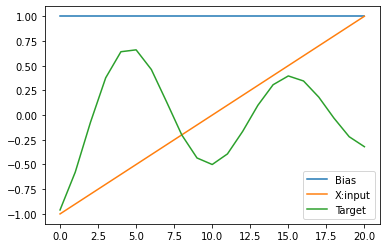

In [144]:
plt.plot(dataset, label='Inline Label')
plt.legend(["Bias","X:input","Target"])

**Create parameters of the Perceptron neural network**

In [145]:
no_inputs = 1
no_hidden_neurons = 5
no_outputs = 1
no_samples = 21
# Weights for layer 1
#V1 = np.array([ 3.6204,3.8180,3.5548,3.0169,3.6398])
#V1 = np.array([[-2.7110, 3.6204],[1.2214, 3.8180],[-0.7778, 3.5548],[2.1751, 3.0169],[2.9979, 3.6398]])
V1 = np.random.rand(5,2)
print(V1.shape)
##Bias1 = np.array([-2.7110, 1.2214, -0.7778, 2.1751, 2.9979])
# Weights for layer 2
#W2 = np.array([-1.0295, -0.6334, -1.2985, 0.8719, 0.5937, 0.9906 ])
W2 = np.random.rand(6,1)
##Bias2 = np.array([-1.0295])
print(W2.shape, W2)
print(X.shape,X, V1)

(5, 2)
(6, 1) [[0.72781506]
 [0.17268696]
 [0.55722   ]
 [0.44664524]
 [0.22027268]
 [0.79830571]]
(21, 2) [[ 1.  -1. ]
 [ 1.  -0.9]
 [ 1.  -0.8]
 [ 1.  -0.7]
 [ 1.  -0.6]
 [ 1.  -0.5]
 [ 1.  -0.4]
 [ 1.  -0.3]
 [ 1.  -0.2]
 [ 1.  -0.1]
 [ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]] [[0.62890585 0.8926286 ]
 [0.52349468 0.54408671]
 [0.44104684 0.15480936]
 [0.27063656 0.66748888]
 [0.77658671 0.20982483]]


**1. Forward Pass**

In [146]:
# Model of the Neural Network (to be discussed in the tutorial)
def forward_prop(X, V1, W2):
    # FIRST LAYER 
    u_li = X.dot(V1.T)
    M = (np.exp(u_li) - np.exp(-u_li))/(np.exp(u_li) + np.exp(-u_li)) # Tangent Hyperbolic function
    # SECOND LAYER
    # print(S1, M.shape)
    bias_2 = np.ones(no_outputs) # getting number of columns
    # print(bias_2.shape,M.shape, W2.shape)
    # Concatenate vectors bias_2 and M1
    zl = np.concatenate((bias_2, M), axis=0)
    # print(M1, M1.shape)
    Y = zl.dot(W2)
    # print(Y.shape) 
    return Y, zl

2. Backpropagation Pass

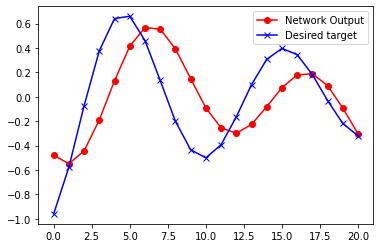

[[ 2.47107588  1.52225992]
 [ 2.6214374   1.85340566]
 [ 1.31194418 -0.86828461]
 [-2.37270868  2.35935284]
 [ 1.77156009 -0.47564276]] (6,) [ 1.          0.99932031  0.99974048  0.41516269 -0.01583759  0.8605478 ]
[[-1.1418973 ]
 [ 0.77367041]
 [ 0.96189072]
 [-0.82211809]
 [-0.92521906]
 [-0.66783145]] [[-0.47824564]
 [-0.54893439]
 [-0.44359544]
 [-0.18943187]
 [ 0.13167467]
 [ 0.41380434]
 [ 0.56759177]
 [ 0.55417689]
 [ 0.39303824]
 [ 0.14953263]
 [-0.0911534 ]
 [-0.25436005]
 [-0.29863291]
 [-0.22706073]
 [-0.0812701 ]
 [ 0.07461601]
 [ 0.17869997]
 [ 0.1884819 ]
 [ 0.09120697]
 [-0.09237316]
 [-0.30322227]] [[ 1.  -1. ]
 [ 1.  -0.9]
 [ 1.  -0.8]
 [ 1.  -0.7]
 [ 1.  -0.6]
 [ 1.  -0.5]
 [ 1.  -0.4]
 [ 1.  -0.3]
 [ 1.  -0.2]
 [ 1.  -0.1]
 [ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]]


In [147]:
learning_rate = 0.08
error = np.zeros([21,1])
Yi = np.zeros([21,1]) # network output
# delta_l1 = np.zeros([5,1])
for epoch in range(700):
  for sample in range(0,21):
    #               --- FeedForward PASS ---
    Yi[sample] , zl = forward_prop(X[sample,:], V1, W2)
#     #       --- Calculation of Individual Error ---
    error[sample] = T[sample] - Yi[sample]
#     # print(error[sample], Yi[sample],X[sample,:])
#     #          --- Backpropagation PASS ---
#     # Update for Output layer Weights wil (W2) 
#     # (Only one output for Regression problems)
    # print(zl.shape)
    for l in range(0,no_hidden_neurons+1):
#       # is plus 1 because we consider the bias
      delta_i2 = -error[sample]*zl[l]
      W2[l] = W2[l] - learning_rate*delta_i2
      # print(zl[l], W2, delta_i2)
#       # print(l)
#     # Update Input weights vlj (V1)
#     # print(V1.shape)
    for l in range(0,no_hidden_neurons):
      delta_l1 = -error[sample] * W2[l+1] * (1 - zl[l+1]*zl[l+1] )      
      for j in range(0,no_inputs+1):
        V1[l][j] = V1[l][j] - learning_rate*delta_l1*X[sample][j]  

plt.plot(Yi, 'red', marker="o", label='Inline Label')  
plt.plot(T, 'b', marker="x", label='Inline Label') 
plt.legend(["Network Output","Desired target"])
plt.show()
print(V1, zl.shape, zl)
print(W2, Yi,X)